In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.datasets import mnist

In [3]:
(x_train,_),(x_test,_)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train=x_train.reshape(x_train.shape[0],784)
x_test=x_test.reshape(x_test.shape[0],784)

In [5]:
x_train=x_train/255.0
x_test=x_test/255.0

In [42]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [47]:
encoded_dim=32
#x=Input(shape=(784,))
#encoded=Dense(encoded_dim,activation="sigmoid")(x)

#decoded=Dense(784,activation="sigmoid")(encoded)

x = Input(shape=(784,))
encoded1 = Dense(128, activation='relu')(x)
encoded2 = Dense(64, activation='relu')(encoded1)
encoded3 = Dense(32, activation='relu')(encoded2)

decoded1 = Dense(64, activation='relu')(encoded3)
decoded2 = Dense(128, activation='relu')(decoded1)
decoded3 = Dense(784, activation='sigmoid')(decoded2)



autoencoder=Model(x,decoded3)

encoder=Model(x,encoded3)

encoded_input=Input(shape=(encoded_dim,))
decoder_layer1=(autoencoder.layers[-3])(encoded_input)
decoder_layer2=(autoencoder.layers[-2])(decoder_layer1)
decoder_layer3=(autoencoder.layers[-1])(decoder_layer2)
decoder=Model(encoded_input,decoder_layer3)

In [48]:
autoencoder.compile(optimizer='adam',loss='mse',metrics=['acc'])

In [50]:
autoencoder.fit(x_train_noisy,x_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0170 - acc: 0.0134
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0169 - acc: 0.0137
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0168 - acc: 0.0139
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0168 - acc: 0.0140
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0167 - acc: 0.0137
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0167 - acc: 0.0137
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0166 - acc: 0.0138
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0166 - acc: 0.0139
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0165 - acc: 0.0139
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0165 - acc: 0.0140
Epoch 11/20
1875/1875 [======

In [51]:
encoded_img=encoder.predict(x_test_noisy)
decoded_img=decoder.predict(encoded_img)

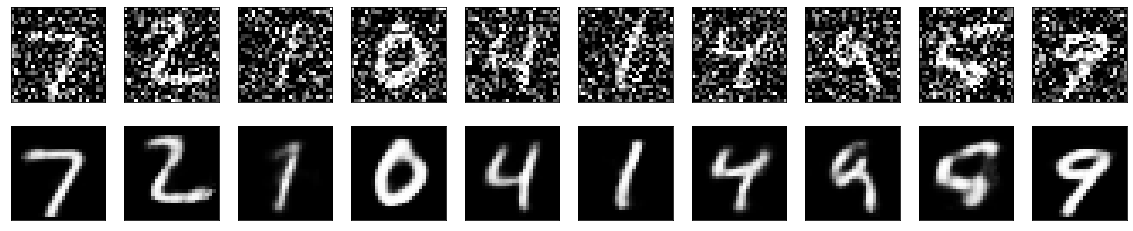

In [52]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()